In [7]:
import json
import pandas as pd

### <font color=Black> IMPORT VARIOUS PACAKGES</font>

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from wordcloud import WordCloud


In [4]:
import sys
import os
import pickle

In [10]:
import sklearn
import gensim

C:\Users\Supreeth\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
from argparse import ArgumentParser
from gensim.models import KeyedVectors
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

from nltk import sent_tokenize
from nltk import pos_tag
from nltk import map_tag
from nltk import word_tokenize
from nltk.corpus import stopwords

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [12]:
#Create a empty list or file
df = []

### <font color=Black> Load the JSON File and create a Data Frame </font>

In [13]:
#Loop through every record and append to the file
for line in open('C:/Users/Supreeth/Downloads/homework.json', 'r'):
    df.append(json.loads(line))

In [14]:
#Covnert to a data frame 
df1 = pd.DataFrame(df)

### <font color=Black> Perform Data Cleaning and required Data Transformation</font>

In [15]:
df1.shape

(95760, 13)

In [16]:
df1.dtypes

emotion_0    object
emotion_1    object
emotion_2    object
emotion_3    object
emotion_4    object
emotion_5    object
emotion_6    object
emotion_7    object
emotion_8    object
emotion_9    object
headline     object
summary      object
worker_id    object
dtype: object

In [18]:
df1['headline'].head(10)


0             Parenting Lessons From a Partial Eclipse
1                                         On Catalonia
2        A Spark of Romance Under Fluorescent Lighting
3    Apple Removes Apps From China Store That Help ...
4    Commerce Secretary’s Offshore Ties to Putin ‘C...
5    Battered and Scarred, ‘Sphere’ Returns to 9/11...
6             Trauma May Have Fallout Over Generations
7    A Year After the Berlin Market Attack, Germany...
8                              We Used to Build Things
9                              Baba Yaga on the Ganges
Name: headline, dtype: object

In [19]:
##Removing Trailing and Leading White Spaces from the String
df1['summary'] = df1['summary'].str.strip()

In [20]:
df1.describe()

,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6,emotion_7,emotion_8,emotion_9,headline,summary,worker_id
count,95570,95576,95606,95603,95569,95557,95561,95575,95567,95588,95760,95760,95568
unique,6,6,6,6,6,6,6,6,6,5,9266,9196,1306
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1,Here’s what you need to know to start your day.,15266729
freq,85643,85818,87311,87695,85400,58192,91334,78226,73435,94832,228,814,317


In [21]:
## Find Number of missing values
df1.isnull().sum()

emotion_0    190
emotion_1    184
emotion_2    154
emotion_3    157
emotion_4    191
emotion_5    203
emotion_6    199
emotion_7    185
emotion_8    193
emotion_9    172
headline       0
summary        0
worker_id    192
dtype: int64

In [22]:
## Create a column list to exclude records which have null or missing values
col_list = []
string = 'emotion_'
for i in range(0,10):
        col_list.append(string + str(i))
print(col_list)

['emotion_0', 'emotion_1', 'emotion_2', 'emotion_3', 'emotion_4', 'emotion_5', 'emotion_6', 'emotion_7', 'emotion_8', 'emotion_9']


In [23]:
#Drop recrods are missing
df2 = df1.dropna(subset=col_list)

In [24]:
#We are excluding the missing records where emotion values are zero . Since there are less than 
#2% of missing records we are using any imputation techniques like mean, median,mode or KNN or clustering and other techinques
df2.shape

(93945, 13)

In [25]:
df2.describe()

,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6,emotion_7,emotion_8,emotion_9,headline,summary,worker_id
count,93945,93945,93945,93945,93945,93945,93945,93945,93945,93945,93945,93945,93758
unique,6,6,6,6,6,6,6,6,6,5,9266,9196,1306
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1,Here’s what you need to know to start your day.,15266729
freq,84181,84363,85801,86180,83962,57205,89784,76902,72210,93201,228,800,314


In [26]:

##Cleaning all the bad Data
df3 = df2[(df2['emotion_0'] != 'cat') & (df2['emotion_0'] != 'fnord') & (df2['emotion_0'] != '-2') & (df2['emotion_0'] != '-1')&
   (df2['emotion_1'] != 'cat') & (df2['emotion_1'] != 'fnord') & (df2['emotion_1'] != '-2') & (df2['emotion_1'] != '-1')&
    (df2['emotion_2'] != 'cat') & (df2['emotion_2'] != 'fnord')& (df2['emotion_2'] != '-2') & (df2['emotion_2'] != '-1')&
    (df2['emotion_3'] != 'cat') & (df2['emotion_3'] != 'fnord')& (df2['emotion_3'] != '-2') & (df2['emotion_3'] != '-1')&
    (df2['emotion_4'] != 'cat') & (df2['emotion_4'] != 'fnord')& (df2['emotion_4'] != '-2') & (df2['emotion_4'] != '-1')&
    (df2['emotion_5'] != 'cat') & (df2['emotion_5'] != 'fnord')& (df2['emotion_5'] != '-2') & (df2['emotion_5'] != '-1')&
    (df2['emotion_6'] != 'cat') & (df2['emotion_6'] != 'fnord')& (df2['emotion_6'] != '-2') & (df2['emotion_6'] != '-1')&
    (df2['emotion_7'] != 'cat') & (df2['emotion_7'] != 'fnord')& (df2['emotion_7'] != '-2') & (df2['emotion_7'] != '-1')&
    (df2['emotion_8'] != 'cat') & (df2['emotion_8'] != 'fnord')& (df2['emotion_8'] != '-2') & (df2['emotion_8'] != '-1')&
    (df2['emotion_9'] != 'cat') & (df2['emotion_9'] != 'fnord') & (df2['emotion_9'] != '-2') & (df2['emotion_9'] != '-1')&
    (df2['headline'] != '-2') & (df2['headline'] != '-1')   &
    (df2['summary'] != '-2') & (df2['summary'] != '-1')
         
         ]


In [27]:
df3.describe()

,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6,emotion_7,emotion_8,emotion_9,headline,summary,worker_id
count,85983,85983,85983,85983,85983,85983,85983,85983,85983,85983,85983,85983,85812
unique,2,2,2,2,2,2,2,2,2,1,9264,9194,1299
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Homes for Sale in New York City,Here’s what you need to know to start your day.,15266729
freq,77663,77875,79168,79524,77499,52840,82781,70966,66595,85983,190,734,281


In [28]:
df3.shape

(85983, 13)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85983 entries, 0 to 95759
Data columns (total 13 columns):
emotion_0    85983 non-null object
emotion_1    85983 non-null object
emotion_2    85983 non-null object
emotion_3    85983 non-null object
emotion_4    85983 non-null object
emotion_5    85983 non-null object
emotion_6    85983 non-null object
emotion_7    85983 non-null object
emotion_8    85983 non-null object
emotion_9    85983 non-null object
headline     85983 non-null object
summary      85983 non-null object
worker_id    85812 non-null object
dtypes: object(13)
memory usage: 9.2+ MB


In [30]:
df4 = df3

In [31]:
df4[col_list] = df4[col_list].apply(pd.to_numeric)

C:\Users\Supreeth\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [35]:
df4.to_csv('C:/Users/Supreeth/Downloads/ds.csv', sep=',')

### <font color=Black> Explatory Data Analysis </font>

In [32]:
df_emotions = df4.drop(['headline', 'summary','worker_id'], axis=1)
counts = []
categories = list(df_emotions.columns.values)
for i in categories:
    counts.append((i, df_emotions[i].sum()))
df_stats = pd.DataFrame(counts, columns=['emotions', '#articles'])
df_stats

,emotions,#articles
0,emotion_0,8320.0
1,emotion_1,8108.0
2,emotion_2,6815.0
3,emotion_3,6459.0
4,emotion_4,8484.0
5,emotion_5,33143.0
6,emotion_6,3202.0
7,emotion_7,15017.0
8,emotion_8,19388.0
9,emotion_9,85983.0


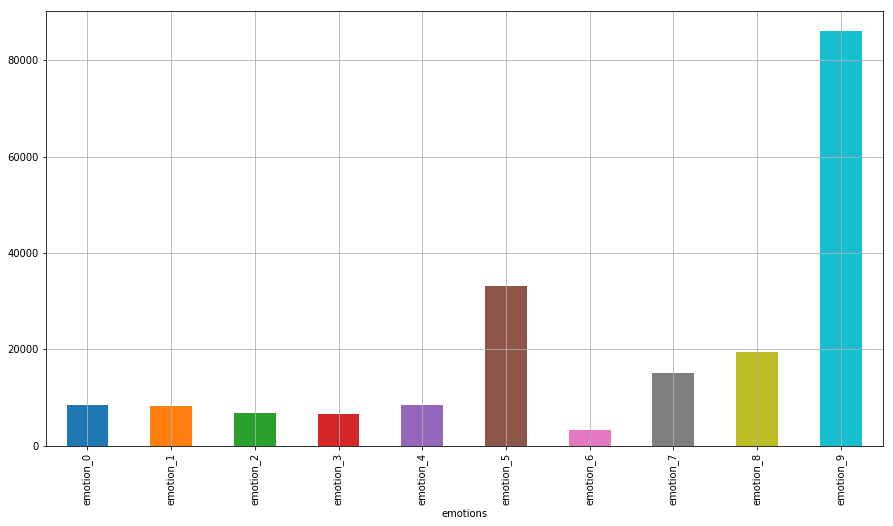

In [33]:
#Emotion 9 is present for every article
df_stats.plot(x='emotions', y='#articles', kind='bar', legend=False, grid=True, figsize=(15, 8))
plt.show()

In [37]:
#Text Analysis
headline_text = pd.Series(df4['headline'].tolist()).astype(str)

In [48]:
headline = headline_text.apply(len)

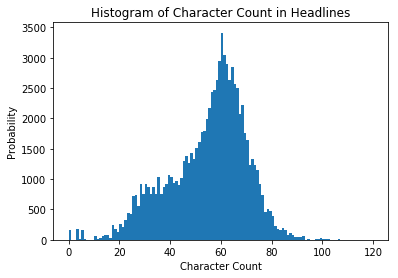

mean 54.44 std 15.23 max 106.00 


In [50]:
#Most of the characters in the headlines are between 50 - 75 characters
plt.hist(headline, bins=120, range=[0, 120])
plt.title('Histogram of Character Count in Headlines')
plt.xlabel('Character Count')
plt.ylabel('Probability')
plt.show()
print('mean {:.2f} std {:.2f} max {:.2f} '.format(headline.mean(),headline.std(), headline.max()))

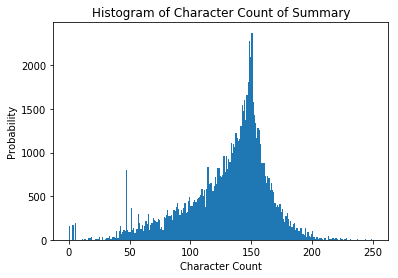

mean 130.37 std 34.30 max 275.00 


In [51]:
summary_text = pd.Series(df4['summary'].tolist()).astype(str)
summary = summary_text.apply(len)
plt.hist(summary, bins=250, range=[0, 250])
plt.title('Histogram of Character Count of Summary')
plt.xlabel('Character Count')
plt.ylabel('Probability')
plt.show()
print('mean {:.2f} std {:.2f} max {:.2f} '.format(summary.mean(),summary.std(), summary.max()))

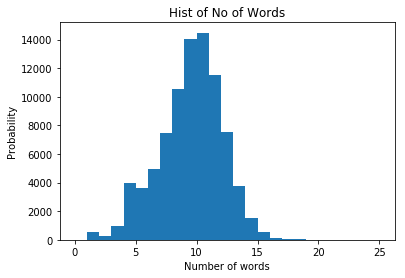

mean 9.02 std 2.61 max 20.00


In [52]:
headline = headline_text.apply(lambda x: len(x.split(' ')))

plt.hist(headline, bins=25, range=[0, 25])
plt.title('Hist of No of Words')
plt.xlabel('Number of words')
plt.ylabel('Probability')
plt.show()


print('mean {:.2f} std {:.2f} max {:.2f}'.format(headline.mean(), headline.std(), headline.max()))

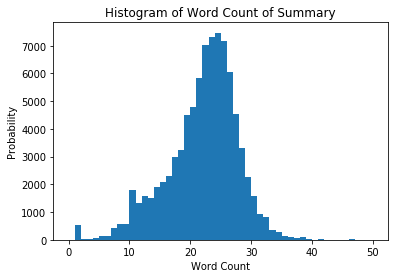

mean 21.60 std 5.77 max 47.00 


In [55]:
summary = summary_text.apply(lambda x: len(x.split(' ')))
plt.hist(summary, bins=50, range=[0, 50])
plt.title('Histogram of Word Count of Summary')
plt.xlabel('Word Count')
plt.ylabel('Probability')
plt.show()
print('mean {:.2f} std {:.2f} max {:.2f} '.format(summary.mean(),summary.std(), summary.max()))

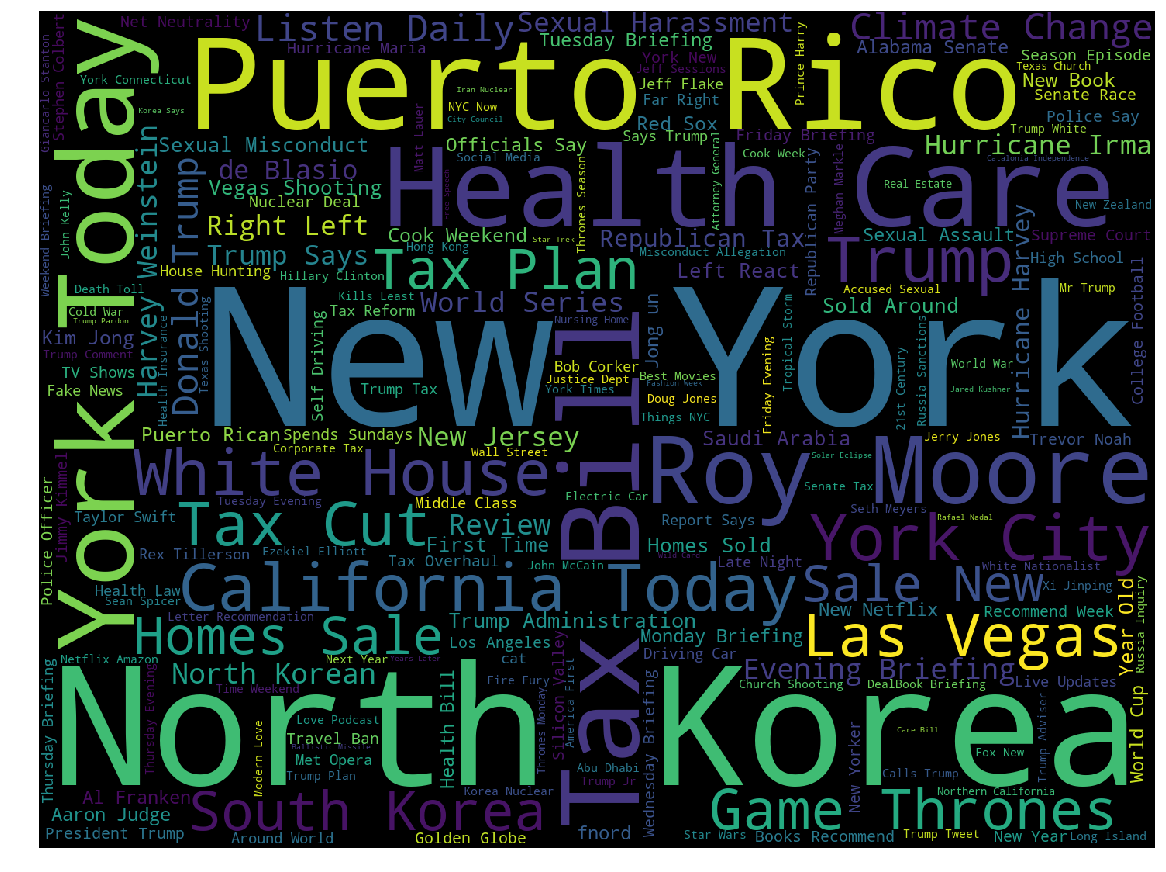

In [53]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(headline_text.astype(str)))
plt.figure(figsize=(20,20))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [54]:
qmarks = np.mean(headline_text.apply(lambda x: '?' in x))
got = np.mean(headline_text.apply(lambda x: 'Game of Thrones' in x))
ny = np.mean(headline_text.apply(lambda x: 'New York' in x))
nk = np.mean(headline_text.apply(lambda x: 'North Korea' in x))
homes = np.mean(headline_text.apply(lambda x: 'Homes' in x))

print('Headlines with question marks: {:.2f}%'.format(qmarks * 100))
print('Headlines with Game of Thornes: {:.2f}%'.format(got * 100))
print('Headlines with New York: {:.2f}%'.format(ny * 100))
print('Headlines with North Korea: {:.2f}%'.format(nk * 100))
print('Headlines with Home: {:.2f}%'.format(homes * 100))

Headlines with question marks: 7.14%
Headlines with Game of Thornes: 0.53%
Headlines with New York: 3.24%
Headlines with North Korea: 2.57%
Headlines with Home: 0.90%


### <font color=Black> Building necessary functions for Word2Vec and TF-IDF Approach </font>

In [99]:
def tag_pos(x):
    sentences = sent_tokenize(x)
    sents = []
    for s in sentences:
        text = word_tokenize(s)
        pos_tagged = pos_tag(text)
        simplified_tags = [
            (word, map_tag('en-ptb', 'universal', tag)) for word, tag in pos_tagged]
        sents.append(simplified_tags)
    return sents

In [58]:
def post_tag_documents(df4):
    x_data = []
    y_data = []
    total = len(df4['headline'].as_matrix().tolist())
    headline = df4['headline'].as_matrix().tolist()
    emotions = df4.drop(['headline', 'summary', 'worker_id'], axis=1).as_matrix()
    for i in range(len(headline)):
        sents = tag_pos(headline[i])
        x_data.append(sents)
        y_data.append(emotions[i])
        i += 1
        if i % 5000 == 0:
            print(i, "/", total)

    return x_data, y_data

In [79]:
stop_words = set(stopwords.words('english'))

In [105]:
def word2vec(x_data, pos_filter):

 
    google_vecs = KeyedVectors.load_word2vec_format(
        'C:/Users/Supreeth/Desktop/GoogleNews-vectors-negative300.bin', binary=True, limit=200000)

    x_data_embeddings = []
    total = len(x_data)
    processed = 0
    for tagged_plot in x_data:
        count = 0
        doc_vector = np.zeros(300)
        for sentence in tagged_plot:
            for tagged_word in sentence:
                if tagged_word[1] in pos_filter:
                    try:
                        doc_vector += google_vecs[tagged_word[0]]
                        count += 1
                    except KeyError:
                        continue

        doc_vector /= count
        if np.isnan(np.min(doc_vector)):
            continue

        x_data_embeddings.append(doc_vector)

        processed += 1
        if processed % 10000 == 0:
            print(processed, "/", total)

    return np.array(x_data_embeddings)


### <font color=Black>Building Target and Predictors Datasets</font>

In [80]:
#Removing the prediction of emotion_9 as it is present for all records
data_x = df4[['headline']].as_matrix()
data_y = df4.drop(['headline', 'summary', 'worker_id','emotion_9'], axis=1).as_matrix()


C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [75]:
data_y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### <font color=Black>Predictive Model using TF-IDF </font>

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.33,random_state=42)


In [83]:
train_x = [x[0].strip() for x in x_train.tolist()]
test_x = [x[0].strip() for x in x_test.tolist()]

### <font color=Black>TF-IDF using Logistic Regression </font>

In [84]:
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

### <font color=Black>Incorporating Pipe Line form sklearn to enable different transformation together </font>

In [85]:
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

In [86]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=10)
grid_search_tune.fit(train_x, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   31.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.6min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  5.5min
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  6.3min
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 10.7min
[Parallel(n_jobs=3)]: Done 108 out of 108 | elapsed: 12.2min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ..._state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'tfidf__max_df': (0.25, 0.5, 0.75), 'clf__estimator__class_weight': ['balanced', None], 'clf__estimator__C': [0.01, 0.1, 1], 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

### <font color=Black>Precision, Recall , F-measure of the Model </font>

In [87]:
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

In [93]:
emotions = df4.drop(['headline', 'summary', 'worker_id'], axis=1).as_matrix()

C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [95]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.15      0.42      0.22      2800
          1       0.24      0.53      0.33      2658
          2       0.18      0.51      0.26      2244
          3       0.20      0.53      0.29      2119
          4       0.20      0.46      0.28      2750
          5       0.48      0.53      0.51     10968
          6       0.10      0.44      0.16      1042
          7       0.45      0.61      0.52      4965
          8       0.30      0.45      0.36      6366

avg / total       0.33      0.51      0.39     35912



### <font color=Black>Using Summary instead of Headline </font>

In [158]:
#Removing the prediction of emotion_9 as it is present for all records
data_x = df4[['summary']].as_matrix()
data_y = df4.drop(['headline', 'summary', 'worker_id','emotion_9'], axis=1).as_matrix()

C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [170]:
data_x

array([['I don’t do partiality. Maybe it was finally time to try.'],
       ['Catalan lawmakers declared independence from Spain on Friday.'],
       ['The world’s most valuable company appears to have pulled down the apps amid China’s deepening crackdown on tools that evade internet controls.'],
       ...,
       ['The reaction was swift and unforgiving after Mr. Kelly, the White House chief of staff, resurrected the debate over the legacy of the Confederacy.'],
       ['The recent cycle of drought and deluge in California led to major fire risk. Climate change makes that cycle worse.'],
       ['David G. Bradley, chairman of Atlantic Media, will retain a minority stake and intends to continue running the magazine for the next three to five years.']],
      dtype=object)

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.33,random_state=42)


In [160]:
train_x = [x[0].strip() for x in x_train.tolist()]
test_x = [x[0].strip() for x in x_test.tolist()]

In [161]:
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [162]:
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

In [163]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=10)
grid_search_tune.fit(train_x, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   39.5s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.6min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  5.7min
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  6.6min
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  8.6min
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 11.1min
[Parallel(n_jobs=3)]: Done 108 out of 108 | elapsed: 12.6min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ..._state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'tfidf__max_df': (0.25, 0.5, 0.75), 'clf__estimator__class_weight': ['balanced', None], 'clf__estimator__C': [0.01, 0.1, 1], 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [164]:
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

In [165]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.15      0.39      0.22      2800
          1       0.23      0.57      0.32      2658
          2       0.19      0.47      0.27      2244
          3       0.19      0.58      0.29      2119
          4       0.20      0.48      0.28      2750
          5       0.47      0.59      0.52     10968
          6       0.15      0.35      0.21      1042
          7       0.42      0.63      0.50      4965
          8       0.32      0.38      0.34      6366

avg / total       0.33      0.52      0.39     35912



### <font color=Black>TF-IDF using SVM </font>

In [154]:
#Computationally Implementing SVM is very expensive. O(n) of SVM is high. 
#Ideally would implement SVM on the server due to avialbility of High RAM and processing power on the servers
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(LinearSVC()),
)])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

### <font color=Black>Word2Vec Approach </font>

In [100]:
 x_data, y_data = post_tag_documents(df4)

C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


5000 / 85983
10000 / 85983
15000 / 85983
20000 / 85983
25000 / 85983
30000 / 85983
35000 / 85983
40000 / 85983
45000 / 85983
50000 / 85983
55000 / 85983
60000 / 85983
65000 / 85983
70000 / 85983
75000 / 85983
80000 / 85983
85000 / 85983


In [102]:
pos_filter = ['NOUN', 'ADJ']

In [106]:
x_embeddings = word2vec(x_data, pos_filter)

C:\Users\Supreeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Supreeth\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


10000 / 85983
20000 / 85983
30000 / 85983
40000 / 85983
50000 / 85983
60000 / 85983
70000 / 85983
80000 / 85983


In [125]:
x_embeddings.shape

(85339, 300)

In [128]:
x_embeddings

array([[ 0.04862467, -0.05210368,  0.00354004, ...,  0.00846354,
         0.10367839, -0.10516866],
       [ 0.30664062, -0.44140625,  0.14355469, ...,  0.33984375,
         0.39453125,  0.38476562],
       [ 0.10243056, -0.0057034 , -0.07221137, ..., -0.05852593,
         0.08773465,  0.09654405],
       ...,
       [ 0.07733154,  0.08569845, -0.13696289, ..., -0.05952962,
         0.01904297,  0.11653646],
       [ 0.07590332,  0.02929688, -0.00292969, ..., -0.03183594,
        -0.00441895, -0.01400146],
       [-0.01445007, -0.00439453, -0.02403564, ...,  0.07651367,
         0.07018738,  0.06574097]])

In [129]:
y_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [130]:
y_data_new = y_data[:85339,:]

In [131]:
y_data_new.shape

(85339, 10)

In [126]:
y_data.shape

(85983, 10)

In [107]:
y_data = np.array(y_data)

In [115]:
y_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_embeddings,y_data_new, test_size=0.33,random_state=42)


In [133]:
pipeline = Pipeline([
                
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

In [134]:
parameters = {
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [135]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=10)
grid_search_tune.fit(x_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed:  4.8min remaining:  1.6min
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  5.7min finished
C:\Users\Supreeth\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label 9 is present in all training examples.
  str(classes[c]))


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'clf__estimator__class_weight': ['balanced', None], 'clf__estimator__C': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

### <font color=Black>Word Embeddings Method shows very poor results compared to TF-IDF. Exploring Recurrent Neural Nets with Word embeddings might be a better option </font>

In [136]:
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(x_test)

In [113]:
pipeline = Pipeline([
        ('clf', OneVsRestClassifier(SVC(), n_jobs=1)),
    ])

In [112]:
parameters = [

        {'clf__estimator__kernel': ['rbf'],
         'clf__estimator__gamma': [1e-3, 1e-4],
         'clf__estimator__C': [1, 10]
        },

        {'clf__estimator__kernel': ['poly'],
         'clf__estimator__C': [1, 10]
        }
         ]

### <font color=Black>Best Coding Practise is to create various functions for the models </font>

In [180]:
def model_svm(x_data, y_data):
    x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.33,random_state=42)
    train_x = [x[0].strip() for x in x_train.tolist()]
    test_x = [x[0].strip() for x in x_test.tolist()]
    pipeline = Pipeline([
        ('clf', OneVsRestClassifier(SVC(), n_jobs=1)),
    ])
    parameters = [

        {'clf__estimator__kernel': ['rbf'],
         'clf__estimator__gamma': [1e-3, 1e-4],
         'clf__estimator__C': [1, 10]
        },

        {'clf__estimator__kernel': ['poly'],
         'clf__estimator__C': [1, 10]
        }
         ]
    model_output(x_train, y_train, x_test, y_test, parameters, pipeline)

In [181]:
def model_lr(x_data, y_data):
    x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.33,random_state=42)
    train_x = [x[0].strip() for x in x_train.tolist()]
    test_x = [x[0].strip() for x in x_test.tolist()]
    pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
    parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
    }
    
    model_output(x_train, y_train, x_test, y_test, parameters, pipeline)

In [179]:
def model_output(train_x, train_y, test_x, test_y, parameters, pipeline):
    grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=10)
    grid_search_tune.fit(train_x, train_y)
    best_clf = grid_search_tune.best_estimator_
    predictions = best_clf.predict(test_x)
    print(classification_report(y_test, predictions))

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.33,random_state=42)

In [184]:
train_x = [x[0].strip() for x in x_train.tolist()]
test_x = [x[0].strip() for x in x_test.tolist()]

In [185]:
parameters = {
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [187]:
pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

In [188]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=10)
grid_search_tune.fit(train_x, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    9.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   24.9s
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed:   34.9s remaining:   11.6s
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:   43.1s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ..._state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'clf__estimator__class_weight': ['balanced', None], 'clf__estimator__C': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [189]:
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

In [190]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2800
          1       0.56      0.04      0.07      2658
          2       0.37      0.00      0.01      2244
          3       0.42      0.00      0.01      2119
          4       0.44      0.00      0.01      2750
          5       0.53      0.28      0.37     10968
          6       0.00      0.00      0.00      1042
          7       0.68      0.24      0.35      4965
          8       0.42      0.03      0.06      6366

avg / total       0.45      0.13      0.18     35912



In [62]:
#import nltk

In [63]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True